<a href="https://colab.research.google.com/github/zerryberry/C1/blob/master/SLR__MY_Take_home_(Day_3)_Questions_%5Bv2_0_121020%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats as stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Read the data

Load the csv file and print the first five observations.

In [2]:
df= pd.read_csv('/content/fish_weight_predict.csv')
print(df.shape)
df.head()

(159, 7)


,Species,Weight,V_length,D_length,C_length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
we = df['Weight']

In [8]:
we.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [4]:
df.columns = [i.strip() for i in df.columns]

In [5]:
df.isna().sum()

Species     0
Weight      0
V_length    0
D_length    0
C_length    0
Height      0
Width       0
dtype: int64

In [6]:
df.drop({'Weight'}, axis=1, inplace=True)

Our objective is to predict the weight of a fish.

**The data definition is as follows:** <br>

**Species:** Species of a fish

**Weight:** Weight of a fish (target/dependent variable)

**V_length:** Vertical length of a fish

**D_length:** Diagonal length of a fish

**C_length:** Cross length of a fish

**Height:** Height of a fish

**Width:** Diagonal width of a fish

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Build a full model on the scaled data and check whether the model is overfitting or not</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# scaling data
from sklearn.preprocessing import StandardScaler
r = StandardScaler()
r1 = r.fit_transform(df)
df_sc = pd.DataFrame(r1, columns=df.columns)
df_sc.head()

,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,-0.305789,-0.282303,-0.106020,0.596579,-0.236529,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
1,-0.225507,-0.198054,-0.002337,0.821261,-0.066579,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
2,-0.235542,-0.179332,-0.010977,0.797341,0.165793,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
3,0.005302,0.054694,0.196390,0.879771,0.022621,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803
4,0.025372,0.054694,0.239592,0.812835,0.426371,-0.272625,-0.737353,-0.346003,-0.379322,-0.310728,-0.19803


In [10]:
df.dtypes

Species      object
V_length    float64
D_length    float64
C_length    float64
Height      float64
Width       float64
dtype: object

In [11]:
df = pd.get_dummies(data= df, columns=['Species'], drop_first=True)

In [18]:
# without scaling

import statsmodels.api as sm

xc= sm.add_constant(df)
md= sm.OLS(we, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     194.7
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           9.67e-82
Time:                        14:10:55   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -907.1500    127.07

In [21]:
# With scaling
xc= sm.add_constant(df_sc)
md= sm.OLS(we, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     194.7
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           9.67e-82
Time:                        14:46:59   Log-Likelihood:                -941.46
No. Observations:                 159   AIC:                             1907.
Df Residuals:                     147   BIC:                             1944.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               399.2698      7.44

In [13]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(df, we)

In [22]:
# scaled data

xtr1, xts1, ytr1, yts1 = train_test_split(df_sc, we)

In [15]:
xc= sm.add_constant(xtr)
md= sm.OLS(ytr, xc).fit()
print(md.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     153.4
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           3.37e-60
Time:                        13:32:36   Log-Likelihood:                -705.95
No. Observations:                 119   AIC:                             1436.
Df Residuals:                     107   BIC:                             1469.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1082.3777    150.37

In [23]:
xc= sm.add_constant(xtr1)
md1= sm.OLS(ytr1, xc).fit()
print(md1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     139.5
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           3.77e-58
Time:                        15:20:11   Log-Likelihood:                -704.12
No. Observations:                 119   AIC:                             1432.
Df Residuals:                     107   BIC:                             1466.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               399.1870      8.72

In [16]:
# lets check on test set
xy= sm.add_constant(xts)
y_pr= md.predict(xy)
y_train_pred = md.predict(xc)

from sklearn.metrics import r2_score, mean_squared_error

print('rsq', r2_score(ytr, y_train_pred), mean_squared_error(ytr, y_train_pred))
print('rsq', r2_score(yts, y_pr), mean_squared_error(yts, y_pr))

rsq 0.9403662870517541 8322.907289568471
rsq 0.8901559631389053 9411.872324270254


In [26]:
# scaled check on test

xy= sm.add_constant(xts1)
y_pr= md1.predict(xy)
y_train_pred = md1.predict(xc)

print('rsq', r2_score(ytr1, y_train_pred), mean_squared_error(ytr1, y_train_pred))
print('rsq', r2_score(yts1, y_pr), mean_squared_error(yts1, y_pr))

rsq 0.9348349660417078 8071.35799127727
rsq 0.9325872911217306 9117.808290336208


In [ ]:
# almost same score on scaled data too

In [17]:
# yes the model is slightly overfitting as we can see the better performace on training set but not that great performance on test set.

# We can use regularization tho

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is there multicollinearity present in the scaled data?
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# we can check the VIF of features 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

ar = [vif(xc.values, i) for i in range(xc.shape[1])]
fr= pd.DataFrame(ar, index=xc.columns)
fr

,0
const,1.010003
V_length,2308.293666
D_length,4402.081127
C_length,2216.992479
Height,54.712344
Width,26.410351
Species_Parkki,6.554437
Species_Perch,60.870222
Species_Pike,32.454507
Species_Roach,16.813444


In [ ]:
# Huge multicollinearity between V_length, D_length, C_length, Height, Weight-- and more

In [ ]:
# The only less multicollinearity is Species_Whitefish, Species_Parkki even in scaled data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Apply the ridge regression with 'alpha = 1.5' and compare the RMSE on the test dataset with the RMSE obtained from linear regression using OLS
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
df.head()

,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [31]:
from sklearn.linear_model import Ridge

tr= Ridge(alpha= 1.5)

In [36]:
tr.fit(xtr, ytr)

Ridge(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [37]:
rid_ts = tr.predict(xts)
np.sqrt(mean_squared_error(yts, rid_ts))

89.50850202832372

In [38]:
xy= sm.add_constant(xtr)
model = sm.OLS(ytr, xy).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     153.4
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           3.37e-60
Time:                        15:30:29   Log-Likelihood:                -705.95
No. Observations:                 119   AIC:                             1436.
Df Residuals:                     107   BIC:                             1469.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1082.3777    150.37

In [41]:
rr= sm.add_constant(xts)
lr_pred= model.predict(rr)
np.sqrt(mean_squared_error(yts, lr_pred))

97.01480466542338

In [42]:
# overfitting as RMSE on traning is less- testing is more - quite obvious inference

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a full model using SGD. Plot a multiple barchart to compare the beta coefficients for each variable obtained by the SGD model and the full model build using OLS 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [43]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()

In [44]:
sgd.fit(df, we)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [52]:
sgd.coef_/10000000000

array([ 1.6342593 ,  2.46210517, -1.72972048,  1.99173354,  8.70611821,
       -0.89334022,  3.76584412, -1.50559736,  0.41510248, -0.32948383,
       -0.32012529])

In [ ]:
xy= sm.add_constant(df)
model = sm.OLS(we, xy).fit()
print(model.summary())

In [77]:
a = list(sgd.coef_/10000000000)
b= list(model.params[1:]/10)

In [78]:
rr= pd.DataFrame({'sgd': a, 'Linear':b})
rr.head()

,sgd,Linear
0,1.634259,-7.939048
1,2.462105,8.351005
2,-1.729720,2.803397
3,1.991734,0.635680
4,8.706118,-0.104542


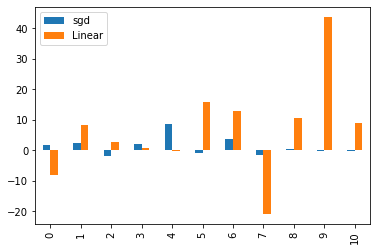

In [79]:
rr.plot(kind='bar')

In [80]:
# scaled down SGD coeff by e^10

# scaled down LR coeff by e^1

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Identify the least significant variables in the data by considering 'alpha = 0.1' 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [95]:
from sklearn.linear_model import Lasso
las= Lasso(alpha=0.1, max_iter=100000).fit(df, we)

In [96]:
np.sum(las.coef_!=0)

11

In [98]:
df.columns

Index(['V_length', 'D_length', 'C_length', 'Height', 'Width', 'Species_Parkki',
       'Species_Perch', 'Species_Pike', 'Species_Roach', 'Species_Smelt',
       'Species_Whitefish'],
      dtype='object')

In [97]:
df.iloc[:,las.coef_!=0]

,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936,0,0,0,0,1,0
155,11.7,12.4,13.5,2.4300,1.2690,0,0,0,0,1,0
156,12.1,13.0,13.8,2.2770,1.2558,0,0,0,0,1,0
157,13.2,14.3,15.2,2.8728,2.0672,0,0,0,0,1,0


In [87]:
las.coef_

array([ -71.7441661 ,   91.09880601,   13.74852375,    2.36292344,
          6.76275974,  109.34331458,   52.2466638 , -276.58406786,
         48.97492227,  360.28875419,   31.30579461])

In [99]:
# with 0.1 learning rate- none of the columns are ignored by Lasso. 

# from the coeff, the least contributing attribute looks like - Height

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What is the impact of diagonal width on the weight of a fish?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# interaction name- Diagonal

# interaction representation= df['diag']

# interaction scope- V_length, Height, Width

# interaction calculation:  np.sqrt(V_length**2 + Height**2 + Width**2)

In [100]:
df_n = df.copy()
df_n['diag'] = np.sqrt(df_n['V_length']**2 + df_n['Height']**2 + df_n['Width']**2)
df_n.head()

,V_length,D_length,C_length,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish,diag
0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0,26.212798
1,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0,27.391396
2,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0,27.321663
3,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0,29.556630
4,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0,29.723073


In [102]:
df_n['weight'] = we

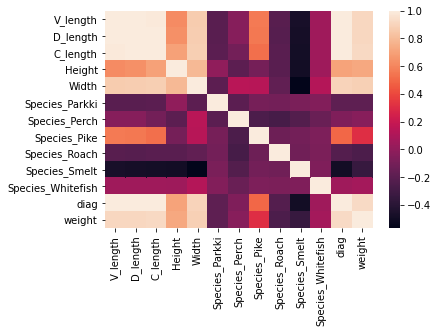

In [106]:
sns.heatmap(df_n.corr())

In [107]:
df_n['diag'].corr(df_n['weight'])

0.9320432430399666

In [ ]:
# Very strong positive correlation. 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Which value of alpha from the list of values returns lowest RMSE on the test set in ridge regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.00001, 0.001, 0.1, 10, 100]
    
Consider 5-fold cross validation.

In [108]:
from sklearn.linear_model import Ridge

In [ ]:
rr= sm.add_constant(xts)
lr_pred= model.predict(rr)
np.sqrt(mean_squared_error(yts, lr_pred))

In [ ]:
al= [0.00001, 0.001, 0.1, 10, 100]
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

cv_ = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

In [113]:
for i in al:
  ar= Ridge(alpha= i, max_iter=10000)
  cv_ = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
  scores = cross_val_score(ar, xts, yts, scoring = 'neg_root_mean_squared_error', cv=cv_, n_jobs=-1)
  print(i, -1*np.mean(scores))

1e-05 108.65723162673093
0.001 107.27474928670645
0.1 87.18382121761482
10 91.60287165079741
100 114.04529907908326


In [ ]:
# best score is from alpha = 0.1

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Select the best value for the elastic net mixing parameter from the list of values
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the below list of values:

    list_of_parameter = [0.0001, 0.001, 0.01, 0.1, 1]

Consider 5-fold cross validation.

In [114]:
from sklearn.linear_model import ElasticNet

In [ ]:
ElasticNet()

In [115]:
for i in al:
  ar= ElasticNet(alpha= i, max_iter=10000)
  cv_ = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
  scores = cross_val_score(ar, xts, yts, scoring = 'neg_root_mean_squared_error', cv=cv_, n_jobs=-1)
  print(i,'is', -1*np.mean(scores))

1e-05 is 107.36541094323336
0.001 is 96.34699195225352
0.1 is 81.22562009636167
10 is 118.98092328111906
100 is 138.1880785986174


In [ ]:
# Same as above- best score is with 0.1

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Identify the best value of alpha from the list of values for lasso regression
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the list of values for alpha:

    list_of_alpha = [0.0001, 0.001, 0.1, 1, 2, 3]
    
Consider 5-fold cross validation.

In [116]:
for i in al:
  ar= Lasso(alpha= i, max_iter=10000)
  cv_ = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
  scores = cross_val_score(ar, xts, yts, scoring = 'neg_root_mean_squared_error', cv=cv_, n_jobs=-1)
  print(i,'is', -1*np.mean(scores))

1e-05 is 107.58464013476457
0.001 is 107.50945312512415
0.1 is 98.27056827640713
10 is 91.22701211549183
100 is 120.78339090737416


In [ ]:
# Ah! a change for once! In one of the greatest cosmic coincidences, we miserable nerds can say that the best RMSE is obtained with alpha = 10

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build the elastic net regression model with 'alpha = 0.1' and best l1_ratio obtained by the GridSearchCV method. Also, compute the RMSE for test set
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [118]:
rr= {'l1_ratio': np.linspace(0.1,1,10)}

In [125]:
from sklearn.model_selection import KFold, GridSearchCV
ar = ElasticNet(alpha=0.1, max_iter=100000)
gs= GridSearchCV(ar, param_grid= rr, scoring= 'r2', cv=3)
gs.fit(xtr, ytr)

GridSearchCV(cv=3, error_score=nan,
             estimator=ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=100000,
                                  normalize=False, positive=False,
                                  precompute=False, random_state=None,
                                  selection='cyclic', tol=0.0001,
                                  warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [126]:
gs.best_params_

{'l1_ratio': 0.8}

In [128]:
# testing on test set

ar.fit(xtr, ytr)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=100000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [129]:
y_test = ar.predict(xts)

In [130]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(yts, y_test)))

95.17490822233094
